<a href="https://colab.research.google.com/github/giauhuynh2002/HuynhPhatGiau-20104026/blob/main/Nhan_dien_gao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT AI/Rice/Train', target_size=(150,150), batch_size=32, class_mode='categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT AI/Rice/Test', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 990 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
training_set.class_indices
test_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
 train= model.fit(training_set,epochs=50,batch_size=128)

Epoch 1/50
31/31 [==============================] - 155s 5s/step - loss: 0.4796 - accuracy: 0.8172
Epoch 2/50
31/31 [==============================] - 158s 5s/step - loss: 0.4238 - accuracy: 0.8222
Epoch 3/50
31/31 [==============================] - 157s 5s/step - loss: 0.3932 - accuracy: 0.8545
Epoch 4/50
31/31 [==============================] - 158s 5s/step - loss: 0.3677 - accuracy: 0.8434
Epoch 5/50
31/31 [==============================] - 152s 5s/step - loss: 0.3879 - accuracy: 0.8384
Epoch 6/50
31/31 [==============================] - 155s 5s/step - loss: 0.3987 - accuracy: 0.8364
Epoch 7/50
31/31 [==============================] - 155s 5s/step - loss: 0.3880 - accuracy: 0.8444
Epoch 8/50
31/31 [==============================] - 155s 5s/step - loss: 0.3604 - accuracy: 0.8545
Epoch 9/50
31/31 [==============================] - 154s 5s/step - loss: 0.3579 - accuracy: 0.8535
Epoch 10/50
31/31 [==============================] - 159s 5s/step - loss: 0.3459 - accuracy: 0.8616
Epoch 11/

In [15]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.03701726347208023
Train Accuracy 0.9848484992980957


In [17]:
model.save("Rice.h5")

In [18]:
model_ANN=load_model('Rice.h5')

In [19]:
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

1/1 [==============================] - 0s 58ms/step
[[1.8485499e-10 8.2079763e-15 1.0000000e+00 9.4090719e-19 2.0462154e-15]]
Kết quả:  Ipsala
Độ chính xác:  1.0


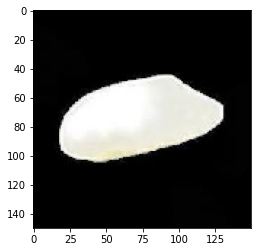

In [29]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/tải xuống (4).jfif"
img = load_img(url, target_size=(150,150,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 150,150,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 113ms/step
[[6.9439236e-21 1.0000000e+00 1.8365790e-11 1.9591780e-12 9.7723979e-34]]
Kết quả:  Basmati
Độ chính xác:  1.0


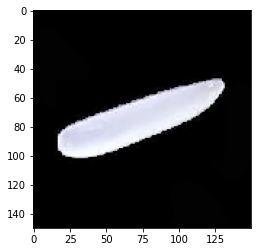

In [38]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/basmati (12799).jpg"
img = load_img(url, target_size=(150,150,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 150,150,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 74ms/step
[[3.1891339e-03 2.4383431e-02 9.6977317e-01 2.7887928e-04 2.3753664e-03]]
Kết quả:  Ipsala
Độ chính xác:  0.9697732


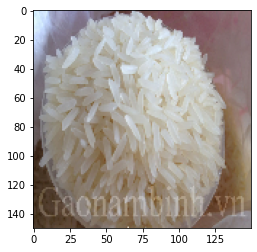

In [36]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/gao-jasmine-4.jpg"
img = load_img(url, target_size=(150,150,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 150,150,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)